# Machine Learning: Auscultando las Redes Neuronales con Python
*Cuarta semana*\
Tomado de los **modulos 12,14,15** de las notas de Diego Luis Aristizábal R,\
Quantum computing UNAL, Universidad Nacional de Colombia.\
Sergio Quiroga Sandoval



Contenido:

1. Módulo 12: imágen digital, conceptos bśsicos.
2. Módulo 14: imágen digital, convolución y filtro
4. Módulo 15: Redes neuronales convolucionales(CNN), generalidades.


## **Módulo 12**
Imágen Digital con NumPY

Las denominadas Redes Neuronales Convolucionales (CNN, por sus siglas en
inglés), en la cual su principal aplicación está en la visión artificial, son una de los temás
más importantes en el Deep Learning. Para lograr un buen entendimiento de éstas es
necesaro tener muy claro lo relacionado con temas muy básicos de las
imágenes digitales:


*   Formatos
*   Muestreo y Cuantización
*   Transformaciones de la Imagen
*   Dominio Espacial y Frecuencial (Espacio de Fourier)
*   La convolución y los Filtros Espaciales y Frecuenciales

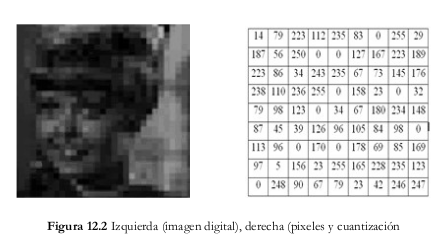

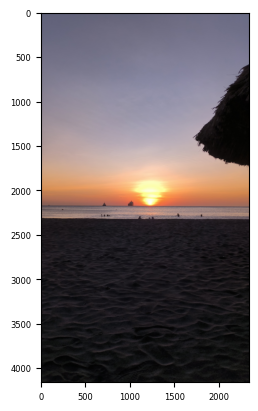

In [55]:
# Cómo cargar una imágen con python

# Primero se debe subir una imágen al notebook y se abre con la función imread,
# esto se hace cambiando la dirección a la dirección de nuestra imágen


import matplotlib.pyplot as plt
#carga la imagen
imagen_original = plt.imread("/content/Atardecer.jpeg")
imagen = imagen_original
fig = plt.figure()
#despliega la imagen
plt.imshow(imagen)
plt.show()

<class 'numpy.ndarray'>
(4160, 2338, 3)


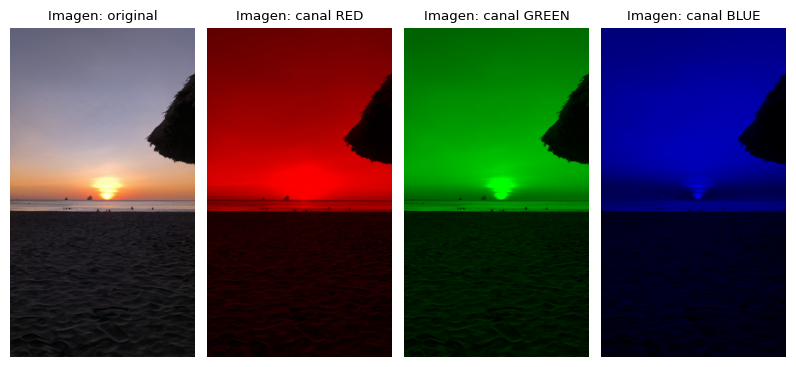

In [56]:
#ap_12.10
import matplotlib.pyplot as plt
import time
#medir tiempo
start = time.time()
# informa cuál es el tipo de imagen
# el resultado es <class 'numpy.ndarray'>
print(type(imagen))
# informa la forma de la imagen
# el resultado es (256, 256, 3)
# tamaño 256x256 y de tres canales: RGB
print(imagen.shape)
#separar los tres canales de color
red_imagen = imagen.copy() # hacer copia
# hace ceros los canales Green y Blue
red_imagen[:,:,1] = 0
red_imagen[:,:,2] = 0
green_imagen = imagen.copy() # hacer copia
# hace ceros los canales Red y Blue
green_imagen[:,:,0] = 0
green_imagen[:,:,2] = 0
blue_imagen = imagen.copy() # hacer copia
# hace ceros los canales Red y Green
blue_imagen[:,:,0] = 0
blue_imagen[:,:,1] = 0
#preparar para desplegar cuatro imégenes
fig, axes = plt.subplots(1,4, figsize=(8, 4))
ax = axes.ravel()
plt.rcParams.update({'font.size': 8}) # tamaño de letra de los títulos
ax[0].imshow(imagen)
ax[0].set_title("Imagen: original") # título
ax[0].axis('off') # apagar ejes
ax[1].imshow(red_imagen)
ax[1].set_title("Imagen: canal RED") # título
ax[1].axis('off') # apagar ejes
ax[2].imshow(green_imagen)
ax[2].set_title("Imagen: canal GREEN") # título
ax[2].axis('off') # apagar ejes
ax[3].imshow(blue_imagen)
ax[3].set_title("Imagen: canal BLUE") # título
ax[3].axis('off') # apagar ejes
fig.tight_layout()
#finaliza tiempo

imágen.jpg (Tamaño):(4160, 2338, 3)
imágen.jpg (Dimensiones):3
imágen.jpg (Tipo):uint8
Arreglo NumPy de imágen.jpg: 
[[[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [108 110 135]
  [108 110 135]]

 [[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [105 107 132]
  [105 107 132]]

 [[ 97  97 121]
  [ 97  97 121]
  [ 97  97 121]
  ...
  [104 106 131]
  [103 105 130]
  [103 105 130]]

 ...

 [[ 21  22  17]
  [ 17  18  13]
  [ 23  24  19]
  ...
  [ 13  13  15]
  [ 13  12  17]
  [ 12  13  17]]

 [[ 13  14   9]
  [ 10  11   6]
  [ 20  21  16]
  ...
  [ 13  13  15]
  [ 17  16  21]
  [ 16  17  21]]

 [[  9  10   5]
  [  8   9   4]
  [ 22  23  18]
  ...
  [ 13  13  15]
  [ 19  18  23]
  [ 18  19  23]]]


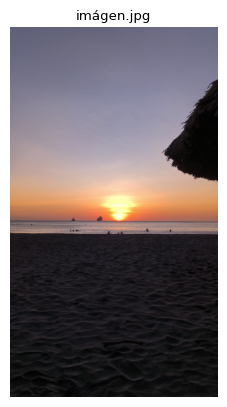

In [57]:
#despliega información de la imagen
print("imágen.jpg (Tamaño):" + str(imagen.shape))
print("imágen.jpg (Dimensiones):" + str(imagen.ndim))
print("imágen.jpg (Tipo):" + str(imagen.dtype))
print("Arreglo NumPy de imágen.jpg: \n" + str(imagen))
fig = plt.figure()
#apagar ejes
plt.axis('off')
#título de la image
plt.title("imágen.jpg")
#despliega la imagen

plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)

plt.show()

El proceso tardó: 0.48786234855651855


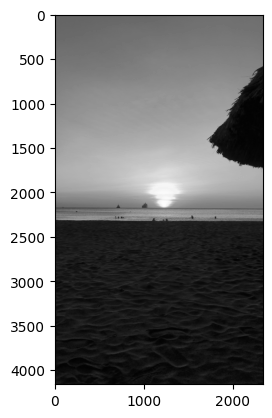

In [4]:
# si la imágen está en RGB para pasarla a escala de grises:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

start = time.time()
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = plt.imread("/content/Atardecer.jpeg")
imagen = rgb2gray(img)
plt.imshow(imagen, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
end = time.time()
imagenbn = imagen
print('El proceso tardó:', end -start)
plt.show()

imagen original: imagen.jpg (dimensiones):(4160, 2338)
imagen original: imagen.jpg (tipo):float64
Arreglo NumPy de imagen original: imagen.jpg : 
[[ 99.7263  99.7263  99.7263 ... 108.2416 112.2412 112.2412]
 [ 99.7263  99.7263  99.7263 ... 108.2416 109.2415 109.2415]
 [ 99.7263  99.7263  99.7263 ... 108.2416 107.2417 107.2417]
 ...
 [ 21.1289  17.1293  23.1287 ...  13.2267  12.8677  13.1558]
 [ 13.1297  10.13    20.129  ...  13.2267  16.8673  17.1554]
 [  9.1301   8.1302  22.1288 ...  13.2267  18.8671  19.1552]]

imagen convertida: imagen.jpg (dimensiones):(4160, 2338)
imagen convertida: imagen.jpg (tipo):float32
Arreglo NumPy de imagen convertida: imagen.jpg : 
[[ 99.7263  99.7263  99.7263 ... 108.2416 112.2412 112.2412]
 [ 99.7263  99.7263  99.7263 ... 108.2416 109.2415 109.2415]
 [ 99.7263  99.7263  99.7263 ... 108.2416 107.2417 107.2417]
 ...
 [ 21.1289  17.1293  23.1287 ...  13.2267  12.8677  13.1558]
 [ 13.1297  10.13    20.129  ...  13.2267  16.8673  17.1554]
 [  9.1301   8.1302

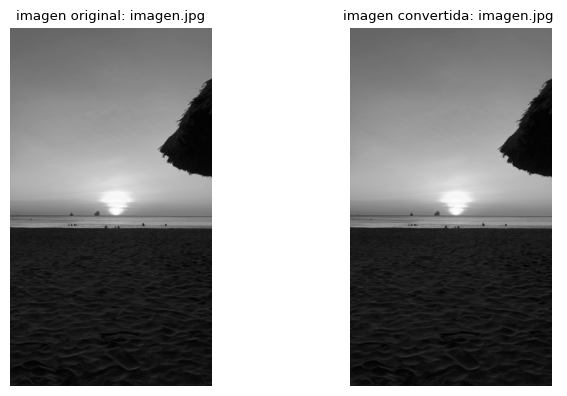

El proceso tardó: 1.3621253967285156


In [59]:
start = time.time()
#conversión de tipos de datos de la imágen (uint64 a uint32)

imagen_convertida = np.array(imagen,dtype = np.float32)

#despliega información de la imagen de la imagen
print("imagen original: imagen.jpg (dimensiones):" + str(imagen.shape))
print("imagen original: imagen.jpg (tipo):" + str(imagen.dtype))
print("Arreglo NumPy de imagen original: imagen.jpg : \n" + str(imagen))
print("")
print("imagen convertida: imagen.jpg (dimensiones):" + str(imagen_convertida.shape))
print("imagen convertida: imagen.jpg (tipo):" + str(imagen_convertida.dtype))
print("Arreglo NumPy de imagen convertida: imagen.jpg : \n" + str(imagen_convertida))
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4))
ax = axes.ravel()

#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("imagen original: imagen.jpg")
# apagar ejes
ax[0].axis('off')
#para desplegar imagen convertida
ax[1].imshow(imagen_convertida,cmap='gray')
#título
ax[1].set_title("imagen convertida: imagen.jpg ")
# apagar ejes
ax[1].axis('off')
#despliega la imagen
fig.tight_layout()
plt.show()
end = time.time()
print('El proceso tardó:', end -start)

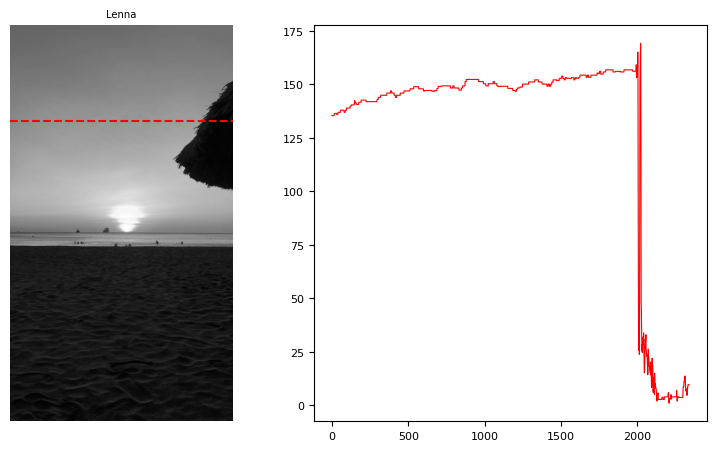

In [60]:
grafico= imagen[1000, :]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4.5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
#dibuja línea roja sobre sobre la fila 100
#para indicar que sobre esta se hará la gráfica de intensidad
ax[0].axhline(y = 1000, color ="red", linestyle ="--")
#gráfico correspondeinet a la fila 100
ax[1].plot(grafico,color='red',linewidth=0.8)
#despliega la imagen
fig.tight_layout()
plt.show()

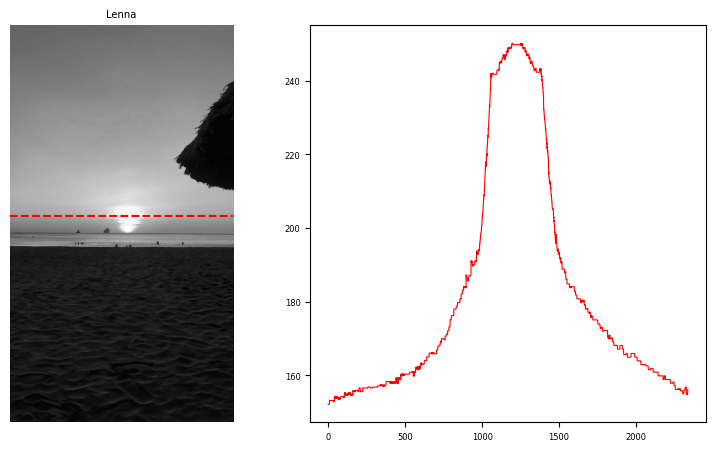

In [61]:
#ap_12.7
#paquete para desplegar plot
import matplotlib.pyplot as plt

grafico= imagen[2000, :]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(8, 4.5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
#dibuja línea roja sobre sobre la fila 100
#para indicar que sobre esta se hará la gráfica de intensidad
ax[0].axhline(y = 2000, color ="red", linestyle ="--")
#gráfico correspondeinet a la fila 100
ax[1].plot(grafico,color='red',linewidth=0.8)
#despliega la imagen
fig.tight_layout()
plt.show()

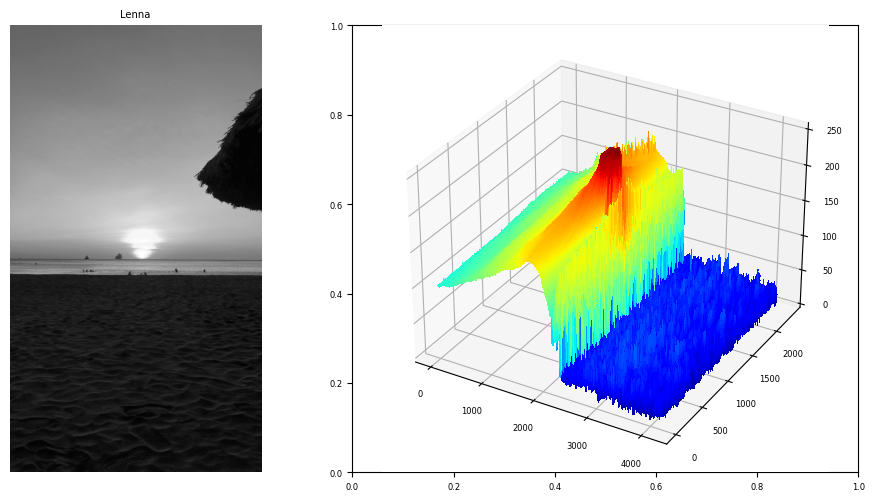

El proceso tardó: 109.4496853351593


In [62]:
# Levantamiento 3d de la imagen
#ap_12.8
from matplotlib import pylab as pl

start = time.time()
datos = imagen_convertida[::1,::1]
# preparar para desplegar dos imágenes
fig, axes = plt.subplots(1,2, figsize=(10, 5))
ax = axes.ravel()
#tamaño de letra de los títulos
plt.rcParams.update({'font.size': 6})
#para desplegar imagen original
ax[0].imshow(imagen,cmap='gray')
#título
ax[0].set_title("Lenna")
# apagar ejes
ax[0].axis('off')
x,y = np.mgrid[:datos.shape[0],:datos.shape[1]]
ax[0] = fig.add_subplot(1,2,2,projection='3d')
ax[0].plot_surface(x,y,datos,cmap=pl.cm.jet,rstride=3,cstride=3,linewidth=1,antialiased=
False)
#despliega la imagen
fig.tight_layout()
plt.show()
end = time.time()
print('El proceso tardó:', end - start)

**Histograma**

Informa sobre el número de píxeles que hay para cada nivel de gris.
Normalizado a la unidad, puede entenderse como la probabilidad de que un valor de gris
determinado aparezca en la imágen.\
La forma del histograma
proporciona información importante como la intensidad media y la dispersión de los
valores de nivel de gris, siendo esta última, la medida de contraste de la imagen.
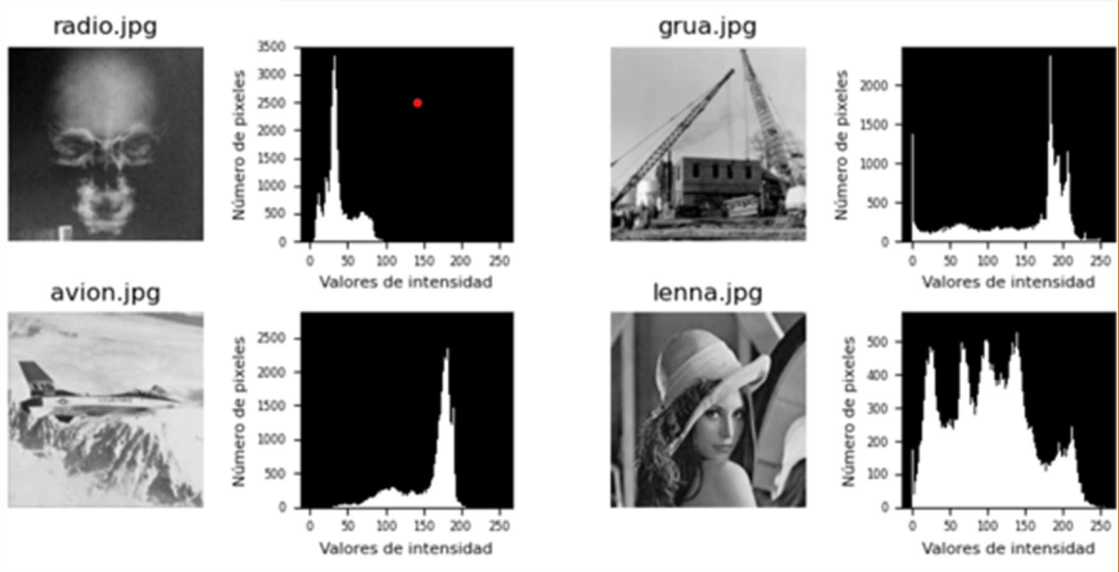
Cuanto mayor es la dispersión a lo largo del eje de los niveles de gris, mayor es el contraste de la
imagen y es entonces cuando el sistema visual humano consigue una mejor respuesta en su
apreciación de la imagen.

El proceso tardó: 0.6198651790618896


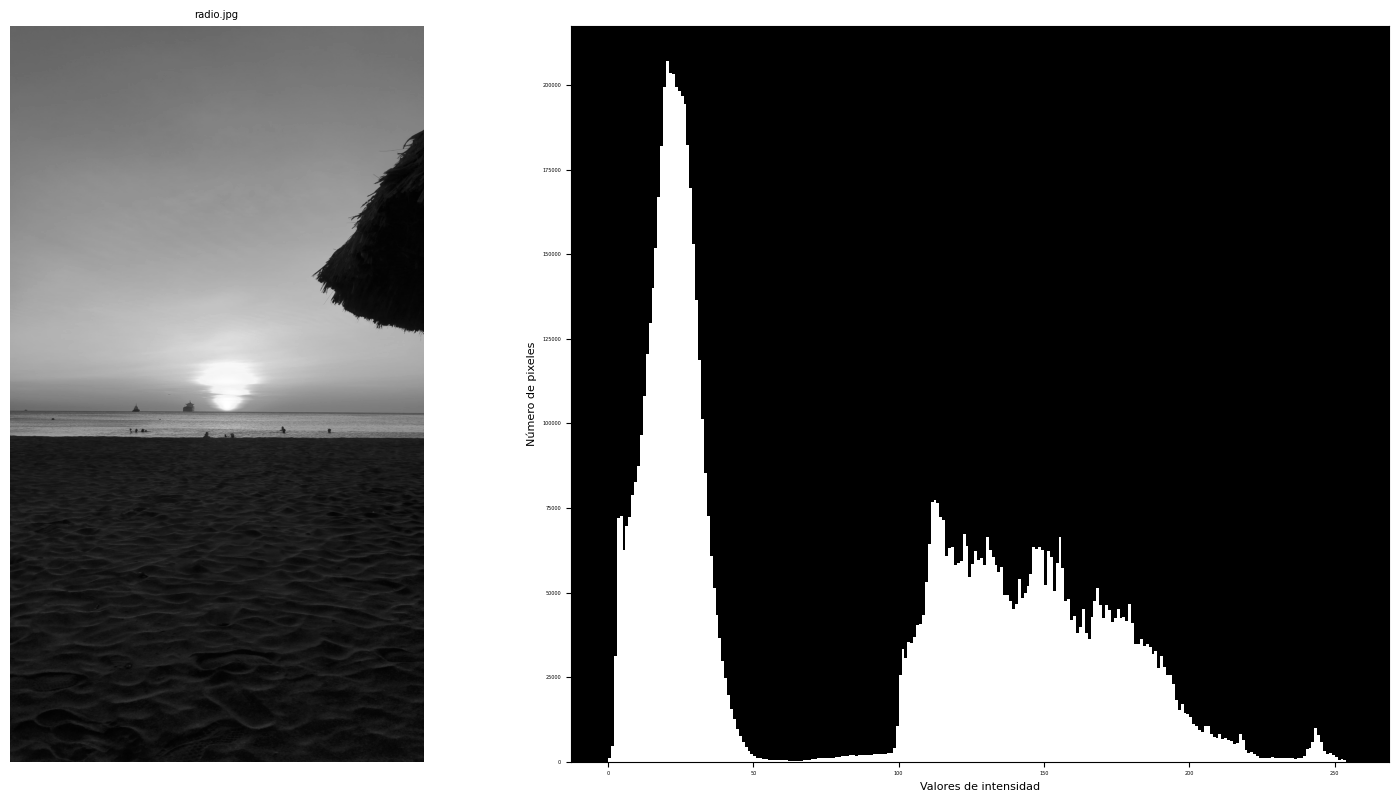

In [63]:
import time
start = time.time()#para medir tiempo

#Preparar para desplegar la imagen y el histograma
fig, axes = plt.subplots(1,2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(imagen,cmap='gray')
ax[0].axis('off') # apagar ejes
ax[0].set_title("radio.jpg") #título
#histogramas con bins = 256: 256 intervalos
ax[1].hist(imagen.ravel(), 256, [0,256],color = 'white', alpha = 1.0)
#formato de font
ax[1].set_xlabel('Valores de intensidad', fontsize=8)
ax[1].set_ylabel('Número de pixeles',fontsize=8)
ax[1].xaxis.set_tick_params(labelsize='xx-small')
ax[1].yaxis.set_tick_params(labelsize='xx-small')
#color del fondo
ax[1].set_facecolor('black')

fig.tight_layout()
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show( )

El proceso tardó: 3.233513832092285


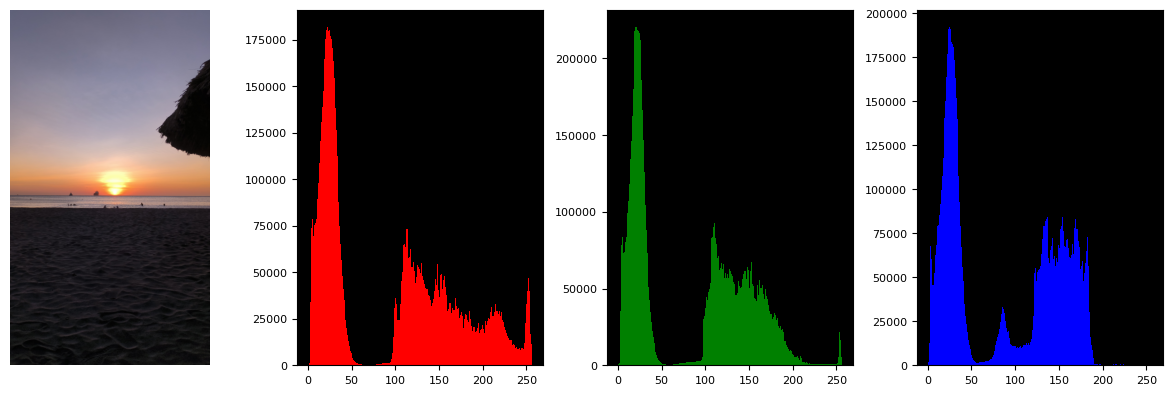

In [64]:
#contar tiempo
start = time.time()
#carga la imagen
imagen = imagen_original
# tamaño de letra de los títulos
plt.rcParams.update({'font.size': 8})
# preparar para desplegar cuatro imágenes
# y sus histogramas
fig, axes = plt.subplots(1,4,figsize=(12,4))
ax = axes.ravel()
ax[0].imshow(imagen)
ax[0].axis('off') # apagar ejes
ax[1].hist(imagen[:, :, 0].ravel(), 256, [0,256], color = 'red', alpha = 1.0)
#color del fondo
ax[1].set_facecolor('black')
ax[2].hist(imagen[:, :, 1].ravel(), 256, [0,256], color = 'green', alpha = 1.0)
#color del fondo
ax[2].set_facecolor('black')
ax[3].hist(imagen[:, :, 2].ravel(), 256, [0,256], color = 'blue', alpha = 1.0)
ax[3].set_facecolor('black')
fig.tight_layout()
#finaliza tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show( )

Nota:
También se puede hacer operaciones con imágenes como sumarlas, restarlas, dividir e incluso operaciones lógicas (and, or, etc)
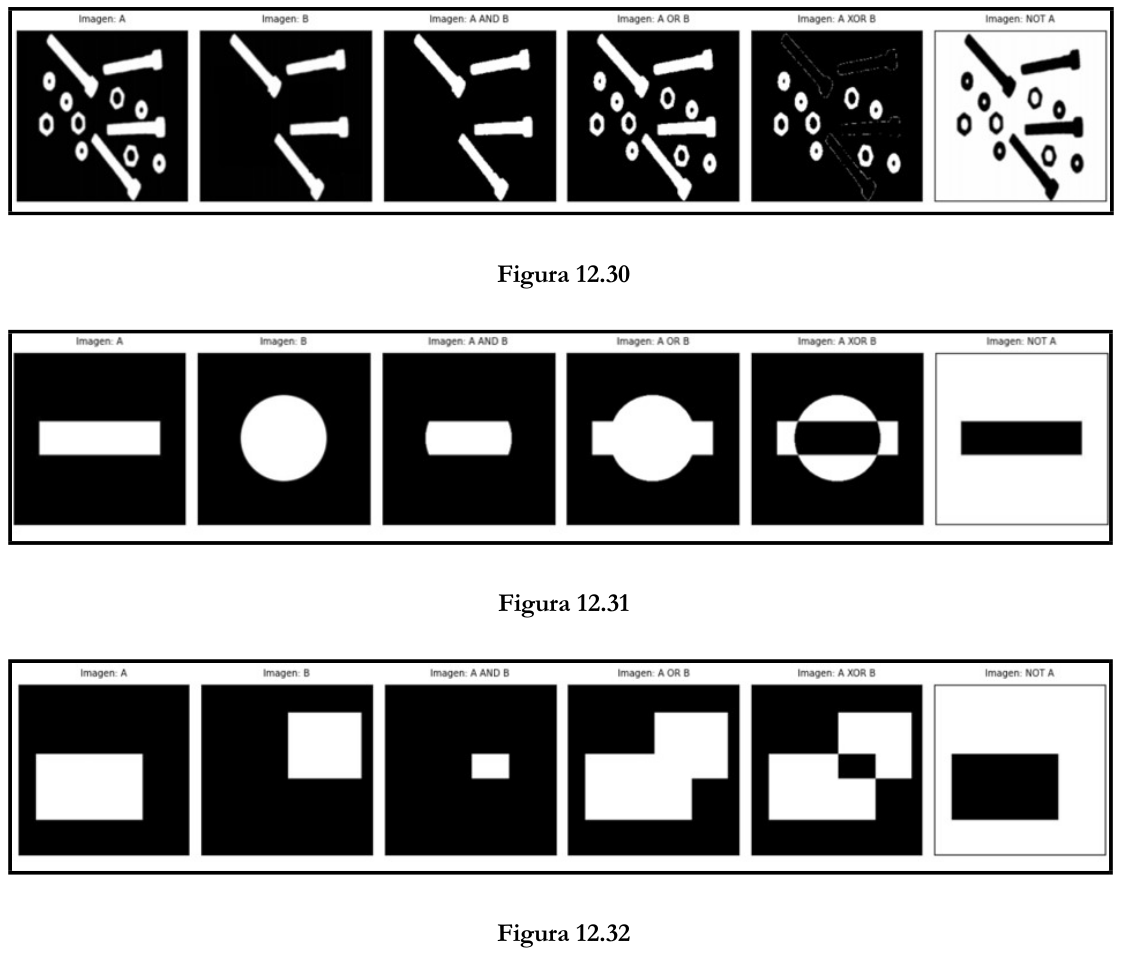

Se pueden realizar también **transformaciones afines**.\
Son aquellas que al realizarse conserva el paralelismo entre los segmentos que lo eran antes de la transformación.
ej: Traslación, rotación y magnificación.

## **Módulo 14**
Convolución y filtros

Las redes neuronales convolucionales (**CNN**, por sus siglas en inglés) apoyan su
funcionamiento en los **filtros** sobre imágenes (convoluciones de filtros con imágenes)
para **encontrar información** en ellas que les permita aprender a clasificarlas y diferenciarlas. \

La teoría de estos filtros se apoya en la forma cómo se puede **representar** una imagen
usando la **superposición de funciones elementales** como lo son los deltas de Dirac y las
funciones sinuosidales.

En éste módulo se estudian filtros básicos y la operación de convolución que es através de
la cual que éstos buscan la información de la imagen. Se avanzará mostrando cómo mediante
la convolución de la imagen f(x, y) con filtros espaciales h(x, y) se puede lograr suavizar o
remarcar bordes de ésta. Los primeros se denomina filtros pasa baja, ya que equivalen a
dejar pasar las frecuencias más bajas en el dominio de las frecuencias, los segundos se
denominan filtros de pasa alta por el efecto contrario. Hay otros filtros lineales intermedios
entres estos dos y se denominan filtros pasa banda.

In [67]:
imagen.shape

(4160, 2338, 3)

El proceso tardó: 66.9775984287262


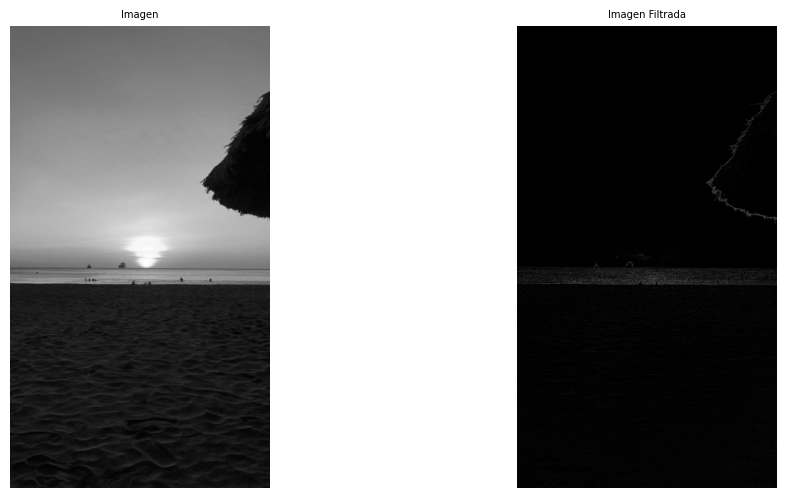

In [6]:
#ap_14.1
import time
start = time.time()#para medir tiempo
#carga la imágenes y se convierte en arreglo NumPy tipo float
imagen_fuente = imagenbn
#convertir los arreglos a float
imagen_fuente_float = np.asarray(imagen_fuente,dtype=np.float32)
#preparar para desplegar resultados
f = plt.figure(figsize=(12,6))
ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
plt.rcParams.update({'font.size':6})
def convolve2d(imagen, kernel):
  m, n = kernel.shape
  if (m == n):
    y, x = imagen.shape
    y = y - m + 1
    x = x - m + 1
    nueva_imagen = np.zeros((y,x))
    for i in range(y):
      for j in range(x):
        valor = np.sum(imagen[i:i+m, j:j+m]*kernel)
        if(valor<0):
          valor = 0 #evitar overflow
        if(valor>255):
          valor = 255
        nueva_imagen[i][j]= valor #evitar overflow
  return nueva_imagen
#kernel
kernel= np.array([[-1, -1, -1],
[-1, 8, -1],
[-1, -1, -1]])
imagen_filtrada=convolve2d(imagen_fuente_float,kernel)
ax1.set_title("Imagen")
ax1.imshow(imagen_fuente_float, cmap='gray')
#apagar ejes
ax1.axis('off')
ax2.set_title("Imagen Filtrada")
#ax2.imshow(np.abs(imagen_filtrada), cmap='gray')
ax2.imshow(imagen_filtrada, cmap='gray')
#apagar ejes
ax2.axis('off')
#finaliza medición de tiempo
end = time.time()
print('El proceso tardó:', end -start)
plt.show()